In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

For practical execution of our model, we use a banking dataset.  The feature names are anonymized, and the data has been normalized and scaled feature-wise.  While this may hinder data cleaning and heuristic analysis, since the data is from a database of related and relevant data and our techniques are applicable whatever the distribution of the features are.  We retain labels in the data indicative of some binary result we wish to predict.

Dataset: [Link](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)


In [7]:
data = pd.read_csv('./data/creditcard_2023.csv')
data = data.drop('id',axis=1)  # The row identification is not relevant
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
mean_value = data['Amount'].mean()
std_value = data['Amount'].std()

data['Amount_std'] = (data['Amount'] - mean_value) / std_value
data = data.drop('Amount',axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_std
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0,0.858446
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0,-0.796369
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0,-1.377010
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0,-0.962118
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0,0.323284


In [9]:
X_test = data.sample(len(data)//20)
X_train = data.drop(X_test.index)
print(len(X_test),len(X_train))

y_test = X_test['Class']
y_train = X_train['Class']
print(len(y_test),len(y_train))


X_train = X_train.drop(['Class'],axis=1)

X_test = X_test.drop(['Class'],axis=1)


28431 540199
28431 540199


In [10]:
#convert from DF to np arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [11]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
y_test = y_test.reshape(1,X_test.shape[1])
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (29, 540199)
Shape of X_test: (29, 28431)
Shape of y_train: (1, 540199)
Shape of y_test: (1, 28431)


In [12]:
type(X_train)

numpy.ndarray

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
'''
W = weights  (n x 1) vector
b = single weight (bais)
X = (n x m) matrix of independent variables
y = labels (1 x m)

sigmoid = 1/(1+e^-x)

prediction = sigmoid(W^T * X + b)

cost function = binary cross entropy
cost = (-1/m) * sum( y * log(a) + (1-y)*log(1-a) )

gradient descent:
dW = dCOST/dW = (A - y) * X^T           (1 x n)
dB = dCOST/dB = (A - y)

W = W - a * dW^T
B = B - a * dB

'''

In [15]:
iterations = 1000


In [28]:
def model(X, y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    b = 0

    costs = []

    for i in range(iterations):

        z = np.dot(W.T, X)+b
        pred = sigmoid(z)

        cost = -(1/m) * np.sum( y*np.log(pred) + (1-y)*np.log(1-pred))
        
        dW = (1/m) * np.dot(pred - y, X.T)
        dB = (1/m) * np.sum(pred - y)

        W = W - learning_rate * dW.T
        b = b - learning_rate * dB
        costs.append(cost)
        if( i % (iterations/100) == 0):
           print(f"cost after {i} iterations is: {cost}")

    
    return W,b,costs


In [16]:
iterations = 10000
learning_rate = 0.00015
w,b,cost_list = model(X_train,y_train,learning_rate=learning_rate,iterations=iterations)

cost after 0 iterations is: 0.6931471805599452
cost after 100 iterations is: 0.6730444584936782
cost after 200 iterations is: 0.6543022051818541
cost after 300 iterations is: 0.6368182479176564
cost after 400 iterations is: 0.6204953762587042
cost after 500 iterations is: 0.6052420615678376
cost after 600 iterations is: 0.5909728179075346
cost after 700 iterations is: 0.5776083331357563
cost after 800 iterations is: 0.5650754231926624
cost after 900 iterations is: 0.5533068518702039
cost after 1000 iterations is: 0.542241055679099
cost after 1100 iterations is: 0.5318218079555261
cost after 1200 iterations is: 0.5219978494990135
cost after 1300 iterations is: 0.5127225063849383
cost after 1400 iterations is: 0.5039533098450678
cost after 1500 iterations is: 0.49565162844307387
cost after 1600 iterations is: 0.48778231914389125
cost after 1700 iterations is: 0.4803134011498912
cost after 1800 iterations is: 0.4732157543918328
cost after 1900 iterations is: 0.46646284316302183
cost after

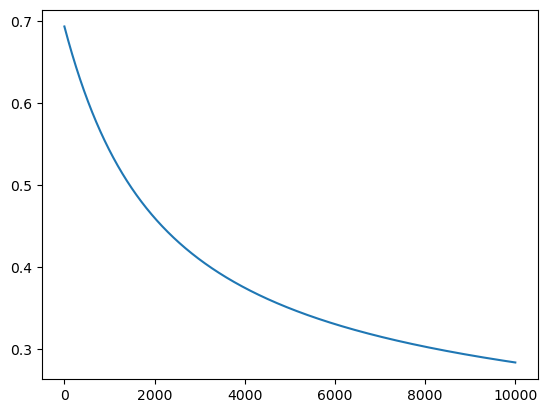

In [30]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [31]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.abs(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [32]:
accuracy(X_test, y_test, w, b)

Accuracy of the model is :  90.91 %


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function to plot sigmoid curve based on learned parameters
def plot_sigmoid(X, y, W, b):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')  # Plot actual data points
    
    # Plot sigmoid curve
    x_vals = np.linspace(np.min(X), np.max(X), 100)
    y_vals = sigmoid(W * x_vals + b)
    plt.plot(x_vals, y_vals, color='red', label='Sigmoid Curve')
    
    plt.xlabel('X')
    plt.ylabel('Probability')
    plt.title('Sigmoid Curve with Learned Parameters')
    plt.legend()
    plt.grid(True)
    plt.show()


In [5]:
def model(X, y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    b = 0

    costs = []

    for i in range(iterations):

        z = np.dot(W.T, X)+b
        pred = sigmoid(z)

        cost = -(1/m) * np.sum( y*np.log(pred) + (1-y)*np.log(1-pred))
        
        dW = (1/m) * np.dot(pred - y, X.T)
        dB = (1/m) * np.sum(pred - y)

        W = W - learning_rate * dW.T
        b = b - learning_rate * dB
        costs.append(cost)
        if( i % (iterations/100) == 0):
           print(f"cost after {i} iterations is: {cost}")

    
    return W,b,costs


# Example data for illustration
X = np.linspace(-5, 5, 100)
y = np.random.randint(0, 2, 100)

learning_rate = 0.01
iterations = 1000

W, b, costs = model(X, y, learning_rate, iterations)

# Plot sigmoid curve at different iterations
for i in range(0, iterations, iterations // 100):  # Change step size as needed
    plot_sigmoid(X, y, W, b)
    print(f"Sigmoid plot after {i} iterations")


IndexError: tuple index out of range